In [ ]:
install.packages('clusterSim')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pixmap’, ‘sp’, ‘RcppArmadillo’, ‘proxy’, ‘ade4’, ‘e1071’




In [ ]:
library(cluster)
library(stats)
library(MASS)
library(ggplot2)
library(dplyr)
library(tidyr)
library(pdfCluster)
library(factoextra)
library(gridExtra)
library(GGally)
library(mclust)
library(aricode)
library(ppclust)
library(clusterSim)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library(pdfCluster): there is no package called ‘pdfCluster’


In [ ]:
col.names <- c('Provinsi', 'Kab/Kota', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'y')
df <- read.csv('cleaned_data.csv', col.names = col.names)
head(df)

,Provinsi,Kab.Kota,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,ACEH,Simeulue,18.98,9.48,7148,66.41,65.28,71.56,87.45,5.71,71.15,1648096,0
2,ACEH,Aceh Singkil,20.36,8.68,8776,69.22,67.43,69.56,78.58,8.36,62.85,1780419,1
3,ACEH,Aceh Selatan,13.18,8.88,8180,67.44,64.40,62.55,79.65,6.46,60.85,4345784,0
4,ACEH,Aceh Tenggara,13.41,9.67,8030,69.44,68.22,62.71,86.71,6.43,69.62,3487157,0
5,ACEH,Aceh Timur,14.45,8.21,8577,67.83,68.74,66.75,83.16,7.13,59.48,8433526,0
6,ACEH,Aceh Tengah,15.26,9.86,10780,73.37,68.86,90.58,90.10,2.61,76.30,5953118,0


In [ ]:
cols <- c('x1', 'x2', 'x3', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10')

In [ ]:
min_max_norm <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

# Apply Min-Max normalization
df[cols] <- as.data.frame(lapply(df[cols], min_max_norm))

# View the first few rows of the normalized dataset
head(df)

,Provinsi,Kab.Kota,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,ACEH,Simeulue,0.4226069,0.7063979,0.1593009,66.41,0.4417040,0.7158147,0.8745,0.4270755,0.35532017,0.003262669,0
2,ACEH,Aceh Singkil,0.4577393,0.6362840,0.2410607,69.22,0.5381166,0.6958087,0.7858,0.6252805,0.15551276,0.003550369,1
3,ACEH,Aceh Selatan,0.2749491,0.6538124,0.2111290,67.44,0.4022422,0.6256877,0.7965,0.4831713,0.10736639,0.009128055,0
4,ACEH,Aceh Tenggara,0.2808045,0.7230500,0.2035958,69.44,0.5735426,0.6272882,0.8671,0.4809274,0.31848820,0.007261205,0
5,ACEH,Aceh Timur,0.3072811,0.5950920,0.2310667,67.83,0.5968610,0.6677003,0.8316,0.5332835,0.07438613,0.018015735,0
6,ACEH,Aceh Tengah,0.3279022,0.7397020,0.3417035,73.37,0.6022422,0.9060718,0.9010,0.1952132,0.47929706,0.012622764,0


# Kmeans

## Base

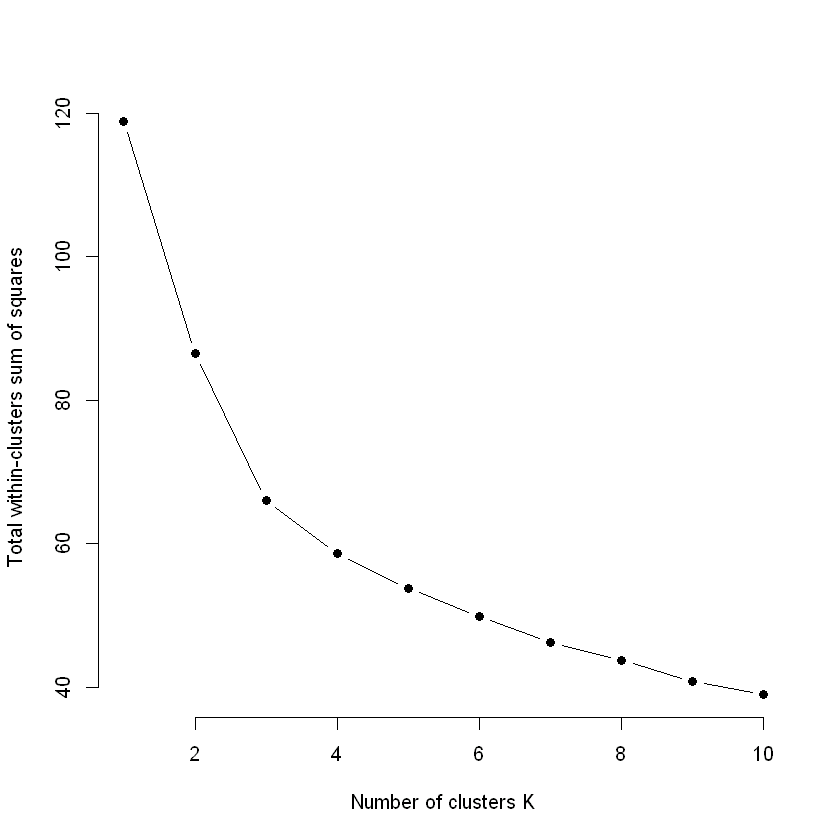

In [ ]:
# Perform k-means clustering with the elbow method
set.seed(42) # For reproducibility

# Function to calculate total within-cluster sum of squares (WSS)
wss <- function(k) {
  kmeans(df[, cols], centers = k, nstart = 25)$tot.withinss
}

# Compute WSS for a range of cluster numbers
k.values <- 1:10
wss_values <- sapply(k.values, wss)

# Plot the WSS values to find the elbow point
plot(k.values, wss_values, type = "b", pch = 19, frame = FALSE,
     xlab = "Number of clusters K",
     ylab = "Total within-clusters sum of squares")

### 3 Centroids

In [ ]:
# Perform k-means clustering with the optimal number of clusters
optimal_k <- 3 # Replace with the optimal number of clusters found from the plot
kmeans_result <- kmeans(df[, cols], centers = optimal_k, nstart = 25)
df$kmeans_clust <- kmeans_result$cluster

#### Plot

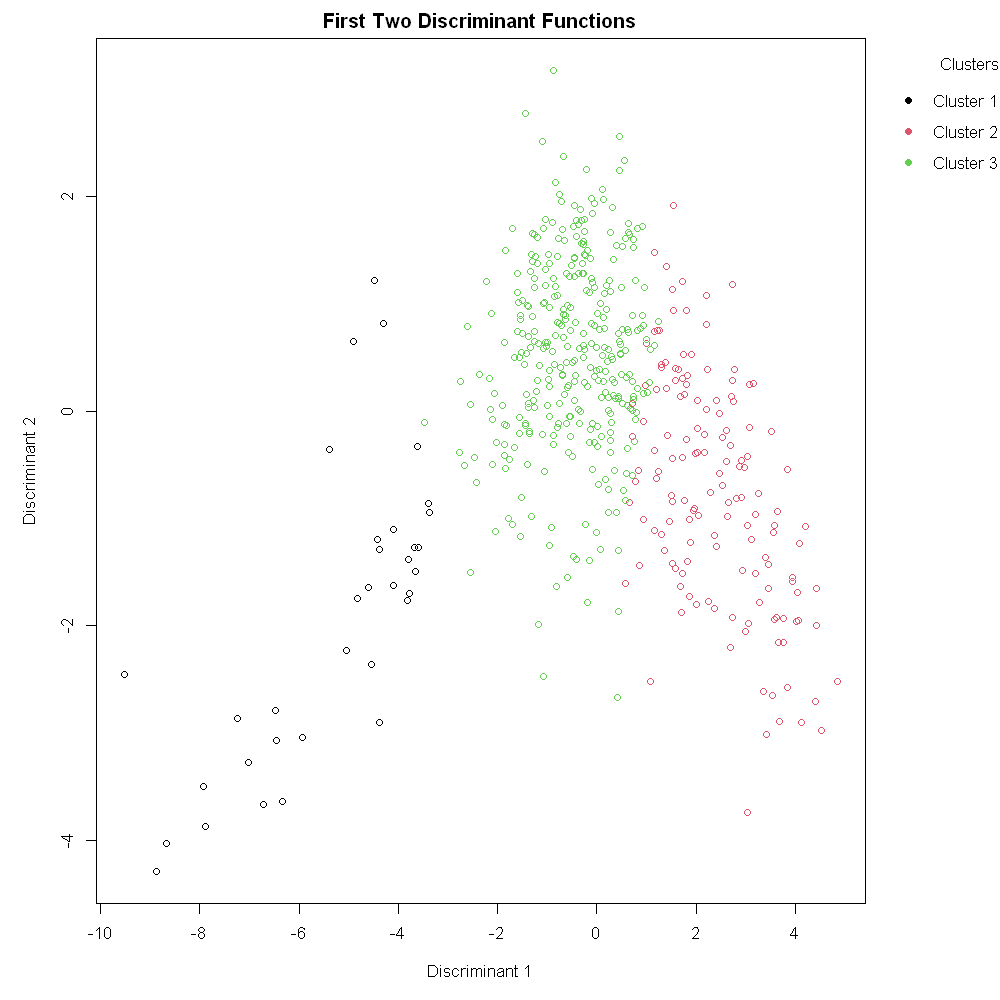

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmeans_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:3), col = 1:3, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

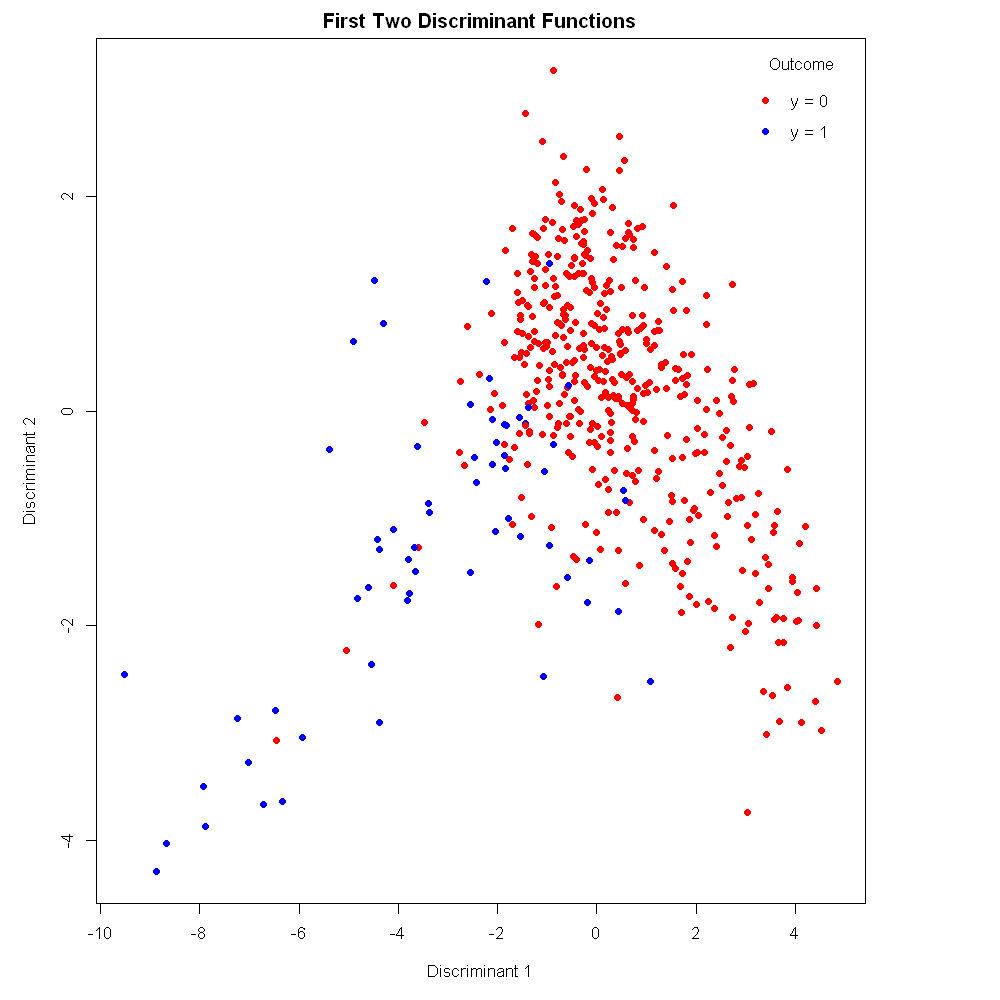

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmeans_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
  lda_scores[, 1], lda_scores[, 2],
  col = colors,
  pch = 19,
  main = "First Two Discriminant Functions",
  xlab = "Discriminant 1",
  ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
  "topright",
  legend = c("y = 0", "y = 1"),
  col = c("red", "blue"),
  pch = 19,
  title = "Outcome",
  xpd = TRUE,
  bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)


#### Silhouette Score

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(df[, cols])
silhouette_score <- silhouette(kmeans_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.2746607


#### DBI

In [ ]:
index.DB(df[, cols], df$kmeans_clust, d=NULL, centrotypes="centroids", p=2, q=2)$DB

[1] 1.31169

### 4 Centroids

In [ ]:
# Perform k-means clustering with the optimal number of clusters
optimal_k <- 4 # Replace with the optimal number of clusters found from the plot
kmeans_result <- kmeans(df[, cols], centers = optimal_k, nstart = 25)
df$kmeans_clust <- kmeans_result$cluster

#### Plot

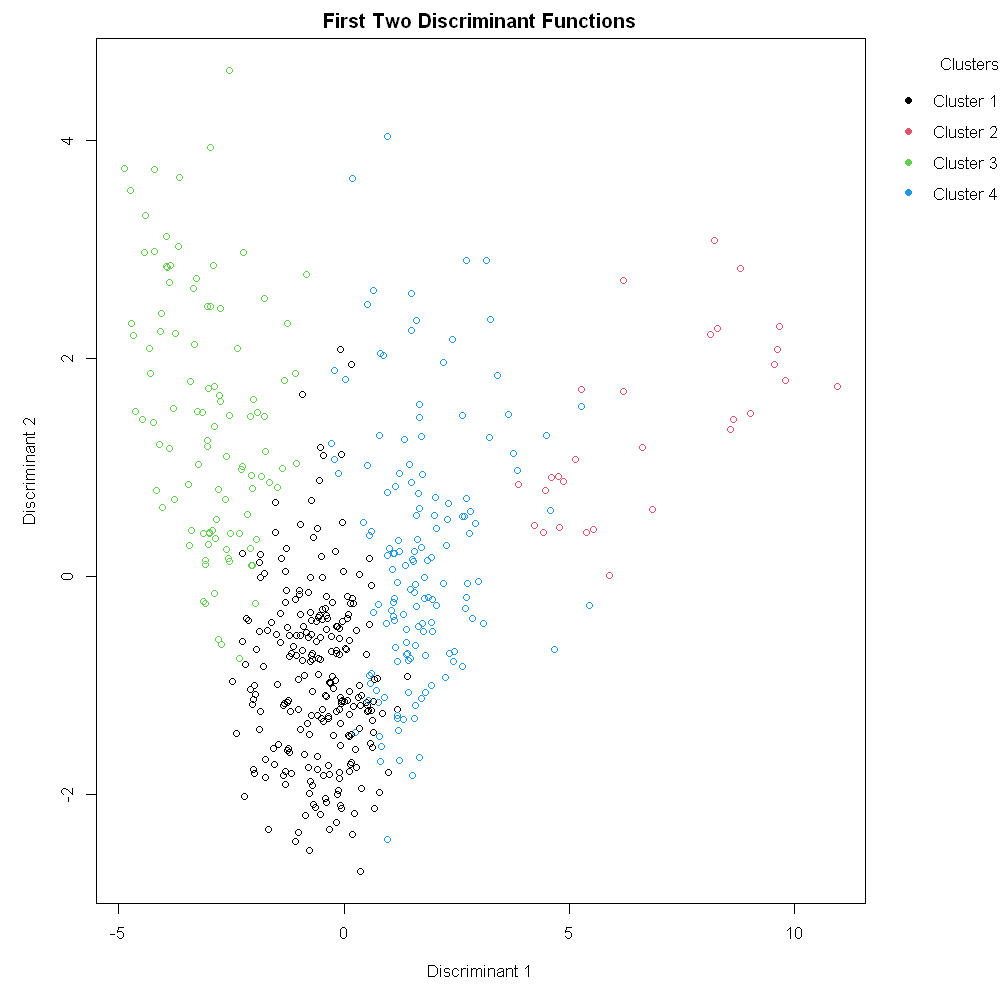

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmeans_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:4), col = 1:4, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

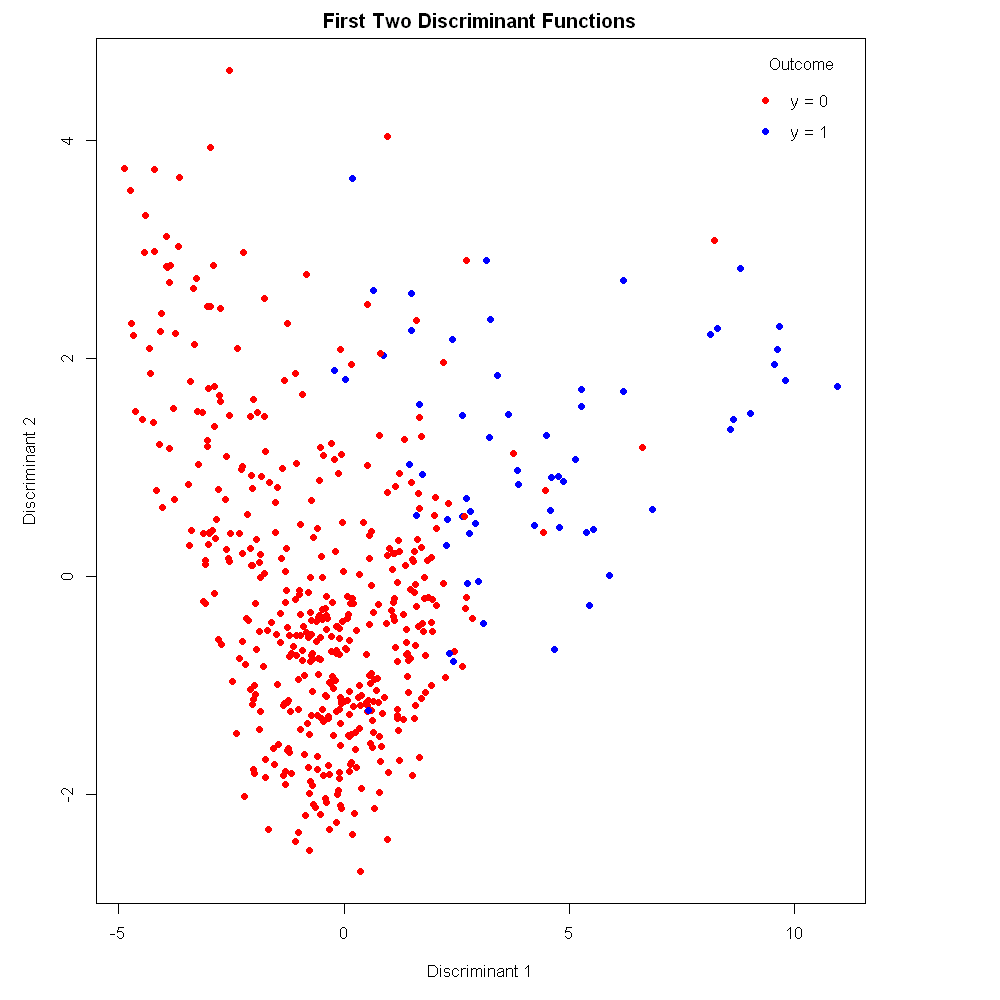

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmeans_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
  lda_scores[, 1], lda_scores[, 2],
  col = colors,
  pch = 19,
  main = "First Two Discriminant Functions",
  xlab = "Discriminant 1",
  ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
  "topright",
  legend = c("y = 0", "y = 1"),
  col = c("red", "blue"),
  pch = 19,
  title = "Outcome",
  xpd = TRUE,
  bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)


#### Silhouette Score

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(df[, cols])
silhouette_score <- silhouette(kmeans_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.1904656


#### DBI

In [ ]:
index.DB(df[, cols], df$kmeans_clust, d=NULL, centrotypes="centroids", p=2, q=2)$DB

[1] 1.644842

## PCA

In [ ]:
pcomps <- prcomp(df[, cols], scale = TRUE)
summary(pcomps)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1415 0.9974 0.9439 0.81319 0.75791 0.67578 0.59381
Proportion of Variance 0.5096 0.1105 0.0990 0.07347 0.06382 0.05074 0.03918
Cumulative Proportion  0.5096 0.6201 0.7191 0.79257 0.85640 0.90714 0.94632
                           PC8     PC9
Standard deviation     0.51646 0.46520
Proportion of Variance 0.02964 0.02405
Cumulative Proportion  0.97595 1.00000

In [ ]:
pcomps$rotation*-1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
x1,0.3551323,-0.1447380,0.227288331,0.476479972,-0.08905632,-0.41925839,-0.50862254,-0.02110157,0.362474908
x2,-0.3725700,0.1570991,0.063417197,-0.147871532,-0.36148648,-0.59662851,-0.02037587,-0.50860453,-0.254738936
x3,-0.3961092,-0.2015604,-0.175488649,-0.148879706,-0.20483856,-0.18445839,0.26905060,0.22958408,0.740559696
x5,-0.3192824,-0.1290897,-0.479599915,0.007913572,0.63368823,-0.04587226,-0.39741885,-0.28869769,0.079766977
x6,-0.3488263,0.3888999,-0.227786439,0.116152466,-0.33845783,0.12580577,-0.51318596,0.49791566,-0.141557111
x7,-0.3102563,0.2381367,0.018848613,0.808034713,0.10041626,0.08307662,0.40320376,-0.11906448,0.004668933
x8,-0.3326623,-0.2414999,0.480647306,-0.022576715,0.40023302,-0.34641967,0.03000319,0.49340642,-0.273749691
x9,0.3079071,-0.1917873,-0.632620046,0.154969190,-0.05955626,-0.43345751,0.26258624,0.28979936,-0.315942597
x10,-0.2298242,-0.7707291,-0.005834559,0.194772697,-0.35986989,0.31860139,-0.12154478,-0.12365693,-0.232615024


Digunakan 5 PC pertama

In [ ]:
pc <- as.data.frame(pcomps$x*-1)[1:5]

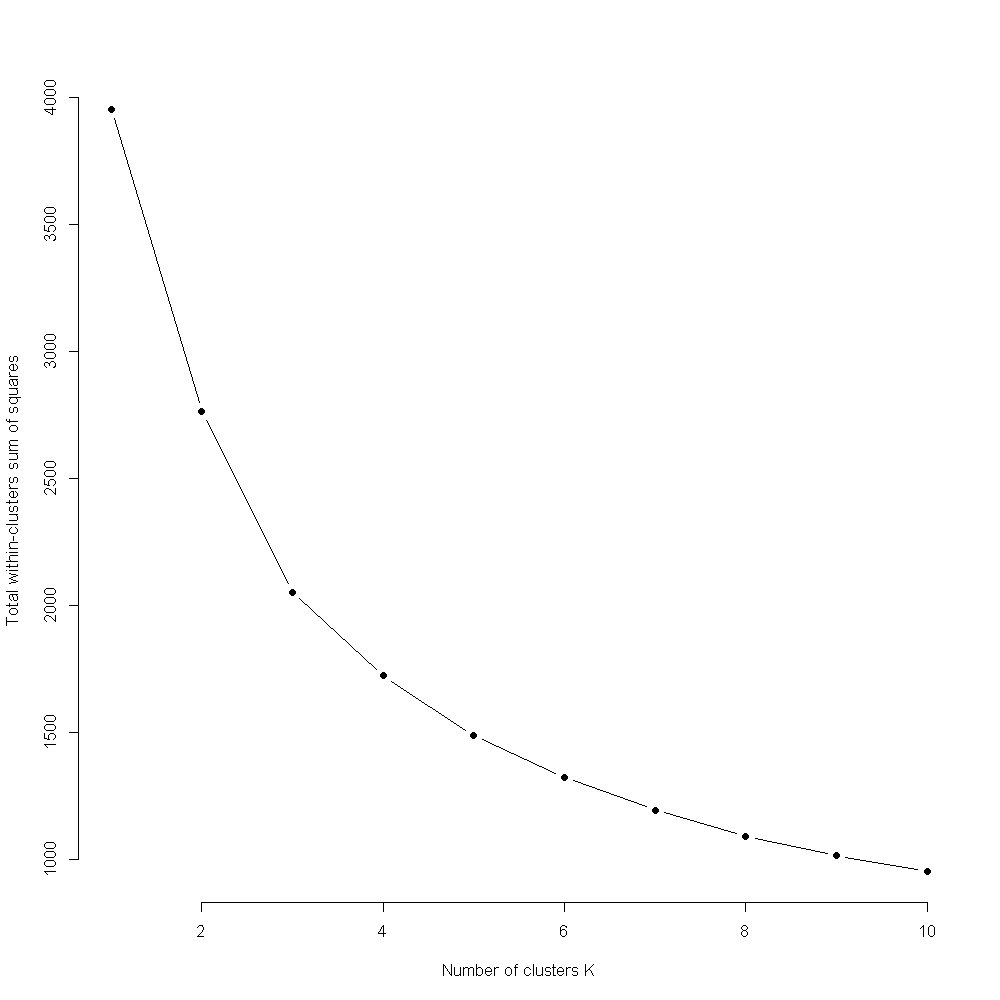

In [ ]:
# Function to calculate total within-cluster sum of squares (WSS)
wss <- function(k) {
  kmeans(pc, centers = k, nstart = 25)$tot.withinss
}

# Compute WSS for a range of cluster numbers
k.values <- 1:10
wss_values <- sapply(k.values, wss)

# Plot the WSS values to find the elbow point
plot(k.values, wss_values, type = "b", pch = 19, frame = FALSE,
     xlab = "Number of clusters K",
     ylab = "Total within-clusters sum of squares")

### 3 Centroids

In [ ]:
# Perform k-means clustering with the optimal number of clusters
optimal_k <- 3 # Replace with the optimal number of clusters found from the plot
kmeans_result <- kmeans(pc, centers = optimal_k, nstart = 25)
df$kmeans_clust <- kmeans_result$cluster

#### Plot

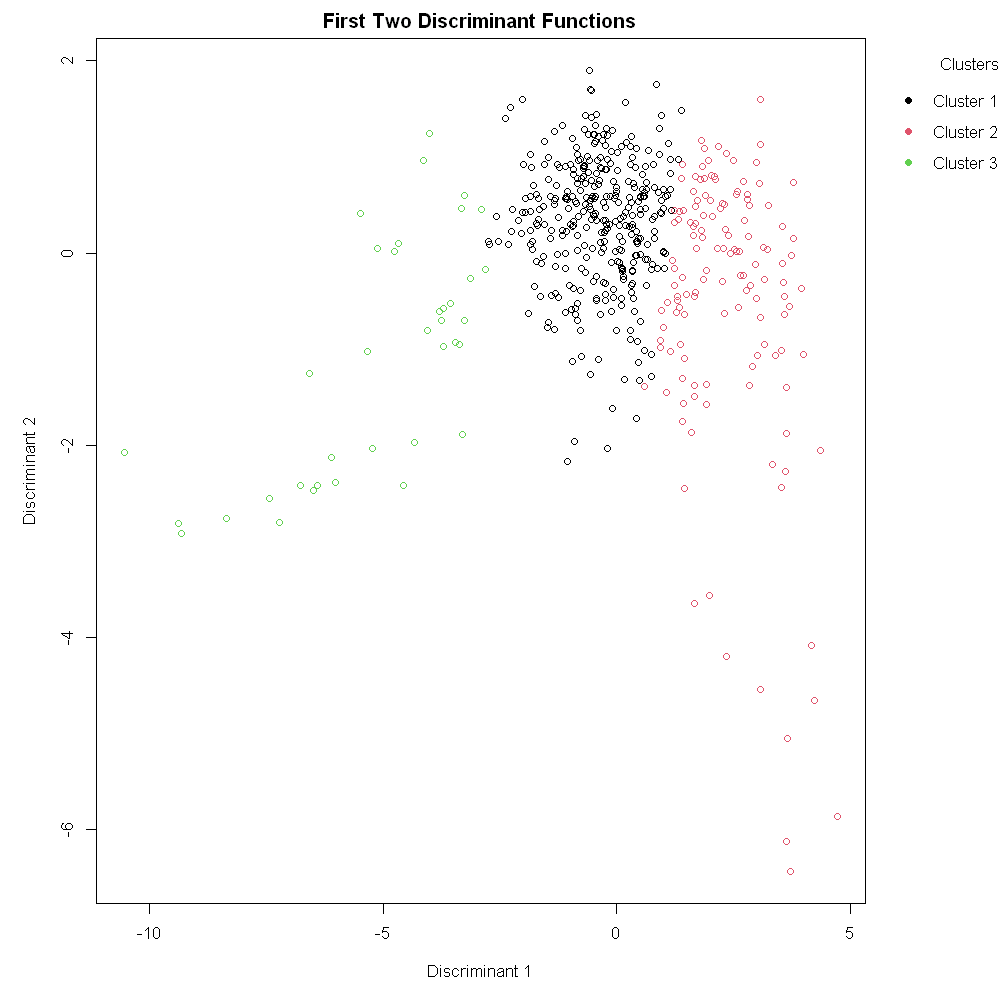

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmeans_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:3), col = 1:3, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

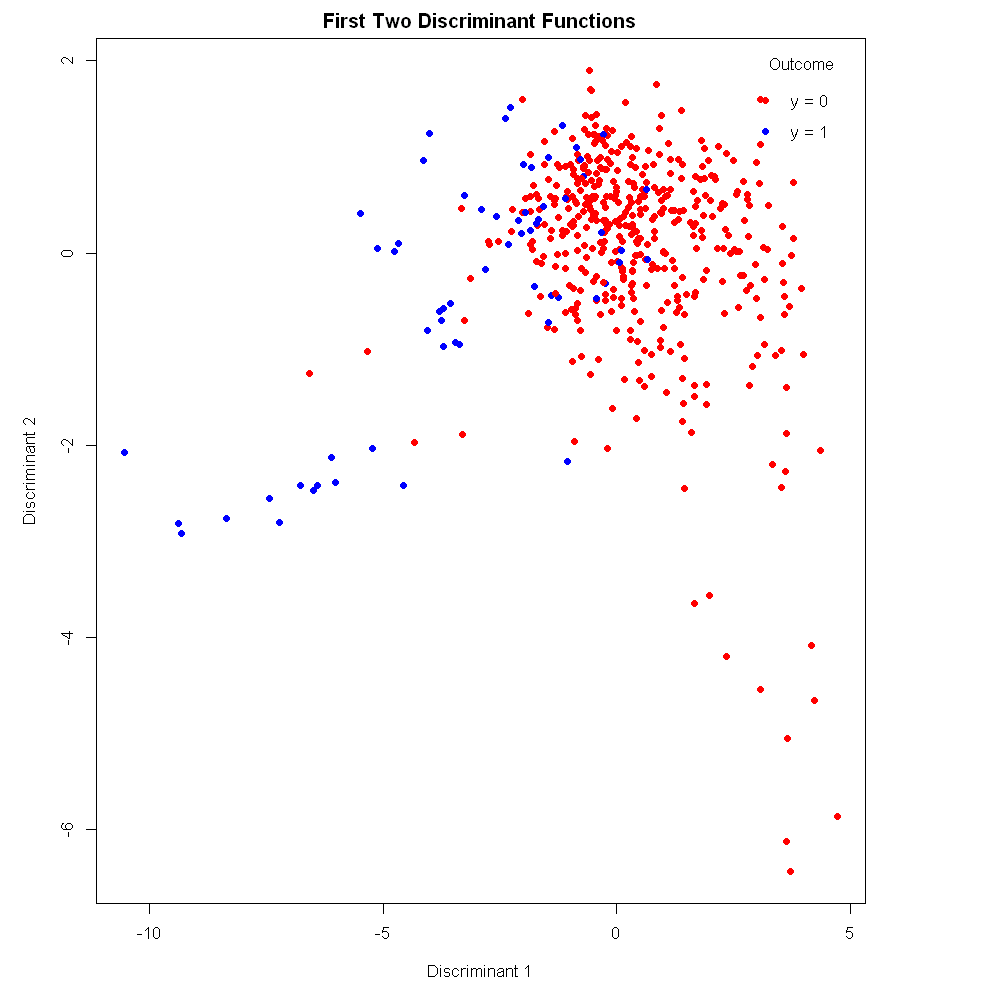

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmeans_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
  lda_scores[, 1], lda_scores[, 2],
  col = colors,
  pch = 19,
  main = "First Two Discriminant Functions",
  xlab = "Discriminant 1",
  ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
  "topright",
  legend = c("y = 0", "y = 1"),
  col = c("red", "blue"),
  pch = 19,
  title = "Outcome",
  xpd = TRUE,
  bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)


#### Silhouette Score

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(pc)
silhouette_score <- silhouette(kmeans_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.3272382


#### DBI

In [ ]:
index.DB(pc, df$kmeans_clust, d=NULL, centrotypes="centroids", p=2, q=2)$DB

[1] 1.232359

### 4 Centroids

In [ ]:
# Perform k-means clustering with the optimal number of clusters
optimal_k <- 4 # Replace with the optimal number of clusters found from the plot
kmeans_result <- kmeans(pc, centers = optimal_k, nstart = 25)
df$kmeans_clust <- kmeans_result$cluster

#### Plot

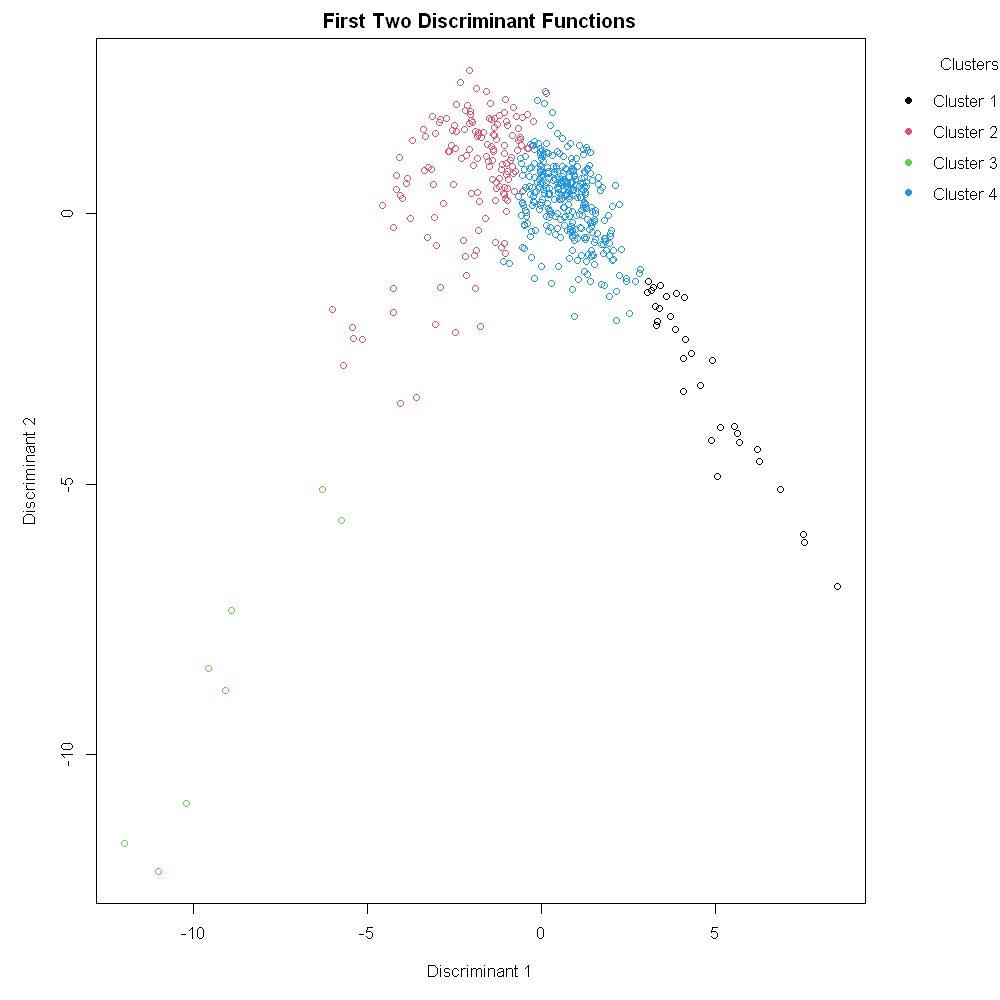

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmeans_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:4), col = 1:4, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

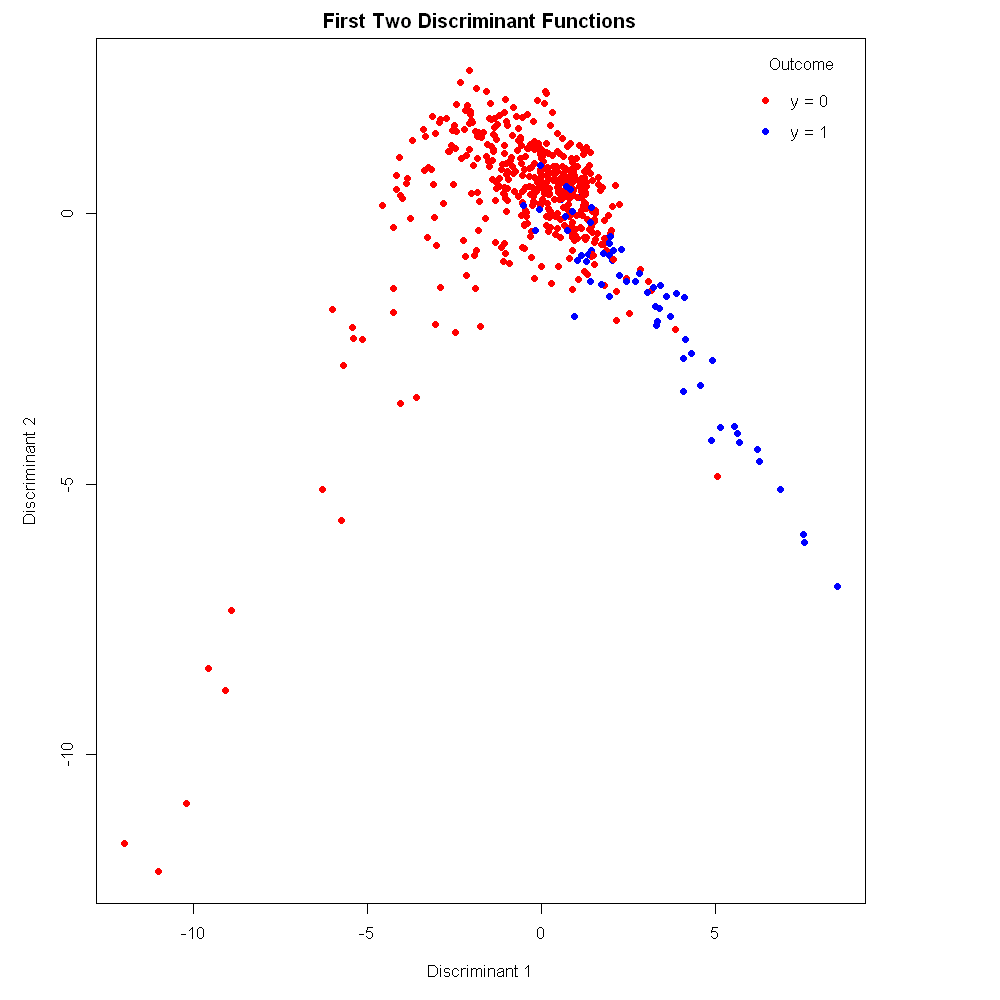

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmeans_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
  lda_scores[, 1], lda_scores[, 2],
  col = colors,
  pch = 19,
  main = "First Two Discriminant Functions",
  xlab = "Discriminant 1",
  ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
  "topright",
  legend = c("y = 0", "y = 1"),
  col = c("red", "blue"),
  pch = 19,
  title = "Outcome",
  xpd = TRUE,
  bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)


#### Silhouette Score

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(df[, cols])
silhouette_score <- silhouette(kmeans_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.2489355


#### DBI

In [ ]:
index.DB(pc, df$kmeans_clust, d=NULL, centrotypes="centroids", p=2, q=2)$DB

[1] 1.021469

# Kmedoids

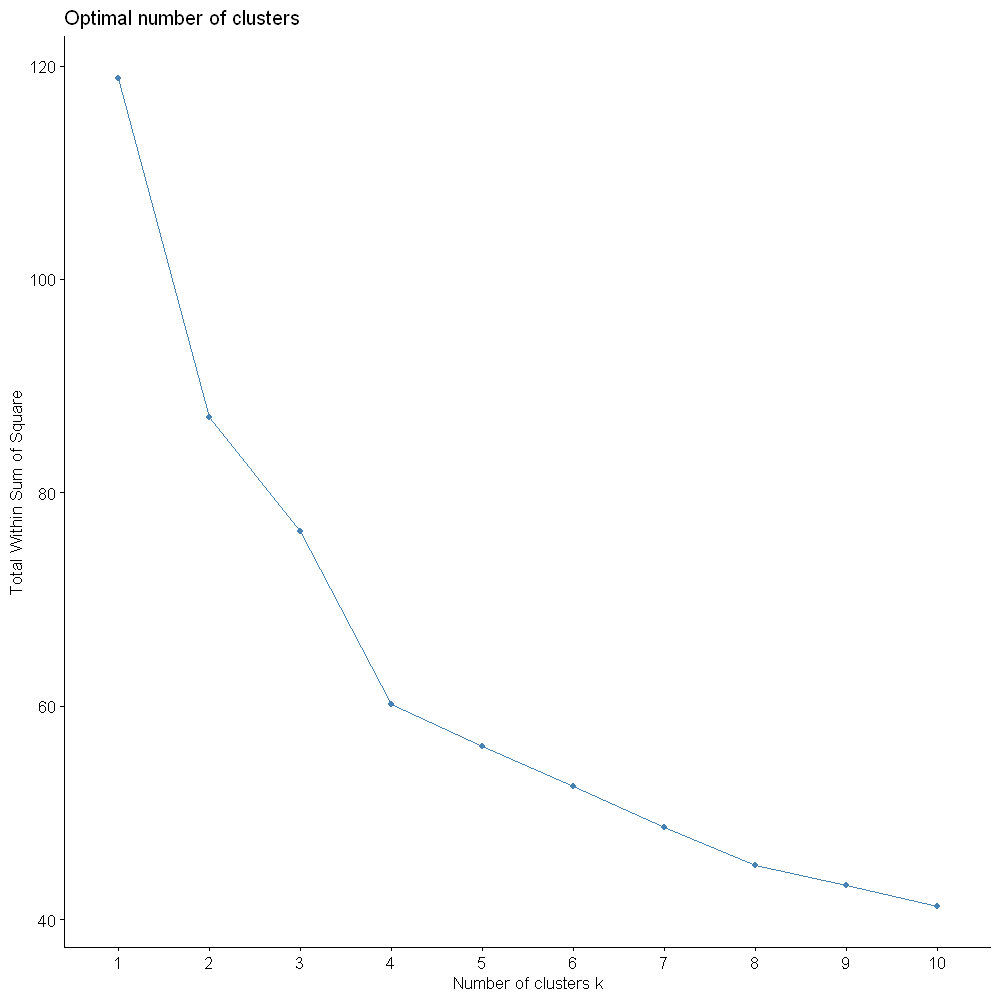

In [ ]:
fviz_nbclust(df[, cols], pam, method = 'wss')

## Base

### 3 Medoids

In [ ]:
# Perform k-medoids clustering with the optimal number of clusters
optimal_k <- 3 # Replace with the optimal number of clusters found from the plot
kmedoids_result <- pam(df[, cols], k = optimal_k)
df$kmedoids_clust <- kmedoids_result$clustering

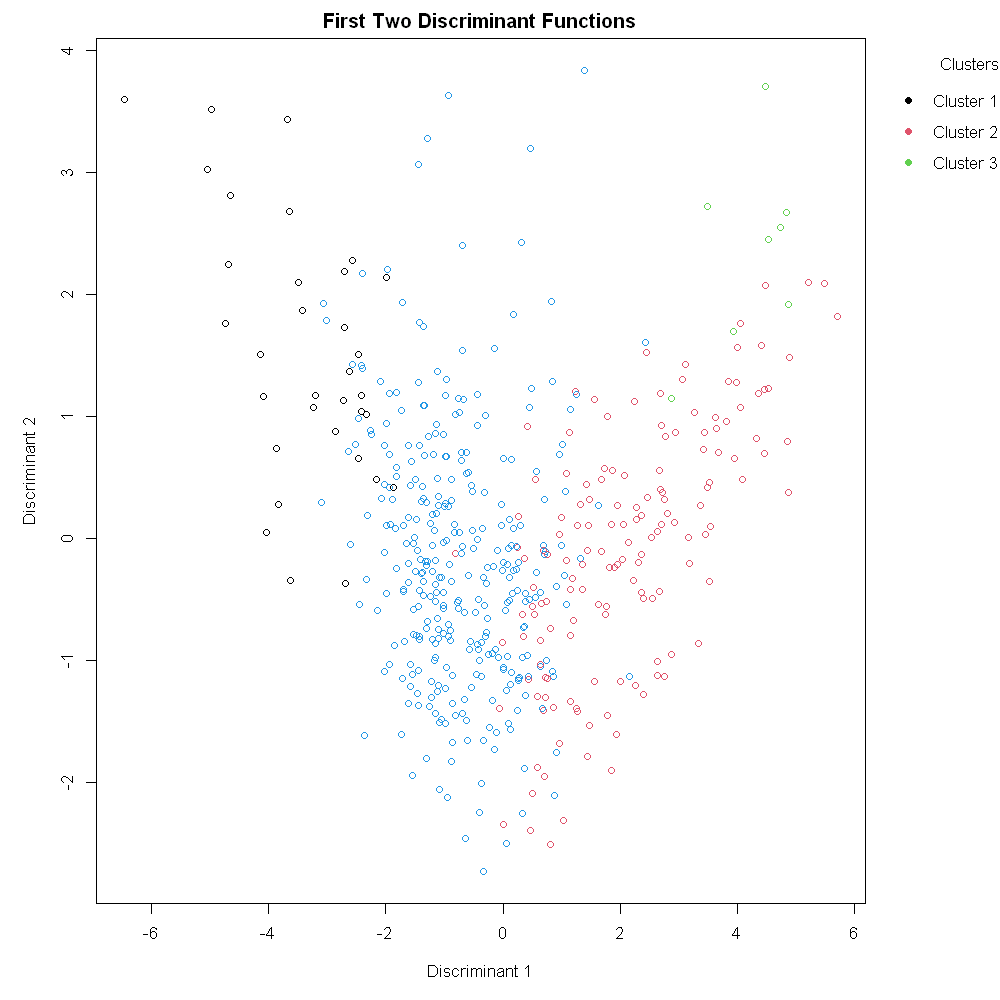

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:3), col = 1:3, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

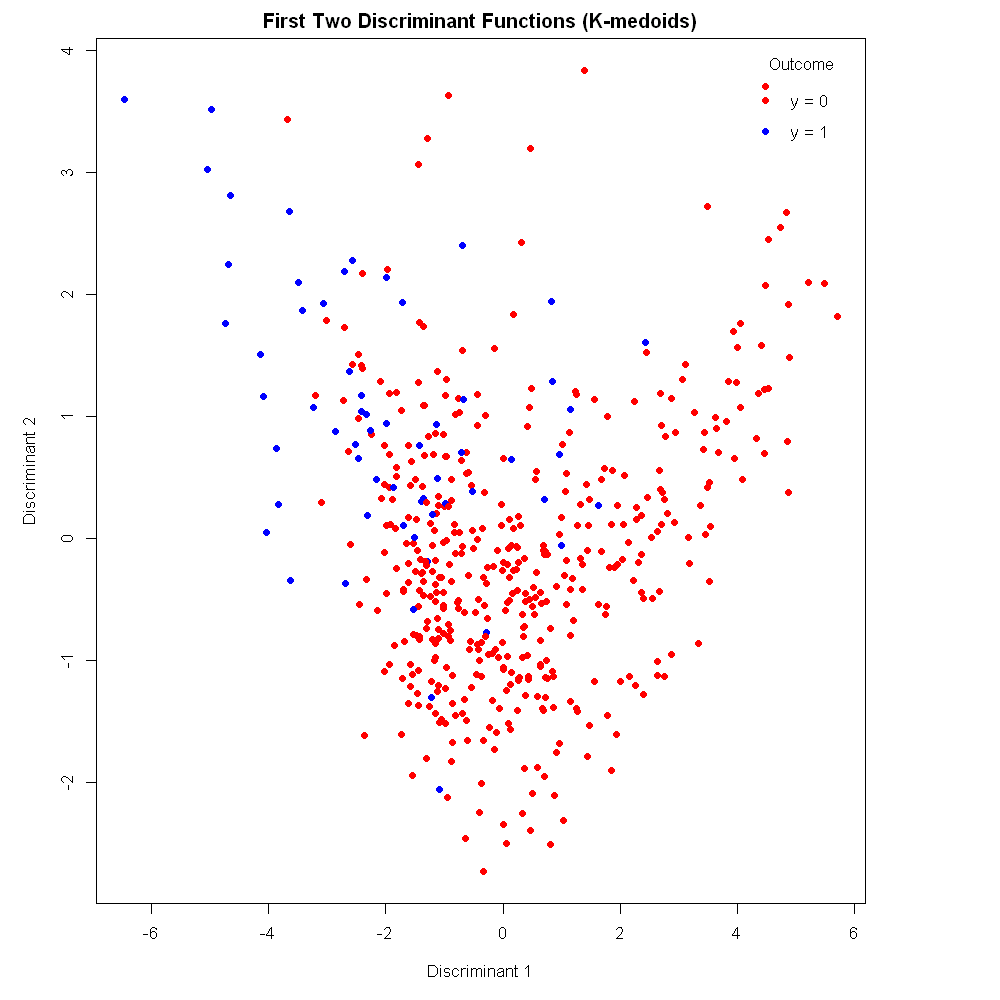

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
    lda_scores[, 1], lda_scores[, 2],
    col = colors,
    pch = 19,
    main = "First Two Discriminant Functions (K-medoids)",
    xlab = "Discriminant 1",
    ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
    "topright",
    legend = c("y = 0", "y = 1"),
    col = c("red", "blue"),
    pch = 19,
    title = "Outcome",
    xpd = TRUE,
    bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)

#### Silhouette

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(df[, cols])
silhouette_score <- silhouette(kmedoids_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.1331244


#### DBI

In [ ]:
index.DB(df[, cols], df$kmedoids_clust, d=dist_matrix, centrotypes="medoids", p=2, q=2)$DB

[1] 2.092558

### 4 Medoids

In [ ]:
# Perform k-medoids clustering with the optimal number of clusters
optimal_k <- 4 # Replace with the optimal number of clusters found from the plot
kmedoids_result <- pam(df[, cols], k = optimal_k)
df$kmedoids_clust <- kmedoids_result$clustering

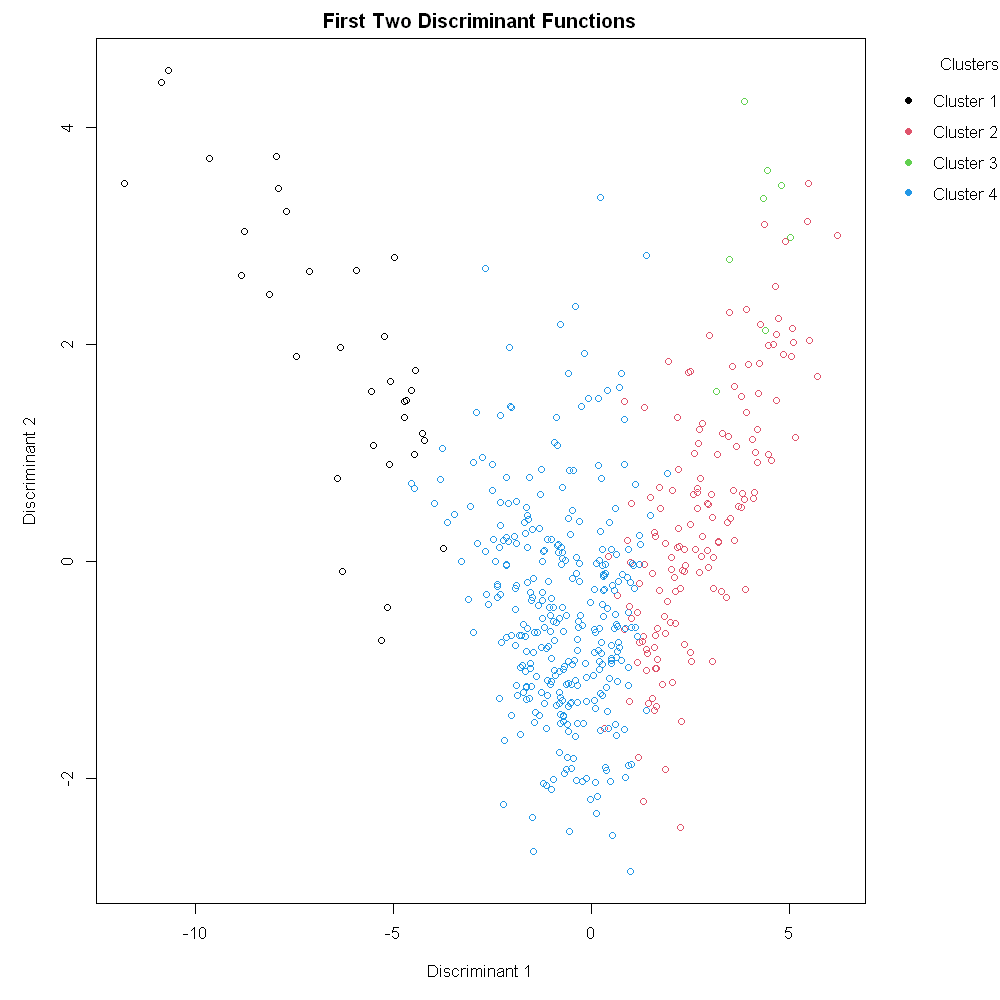

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:4), col = 1:4, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

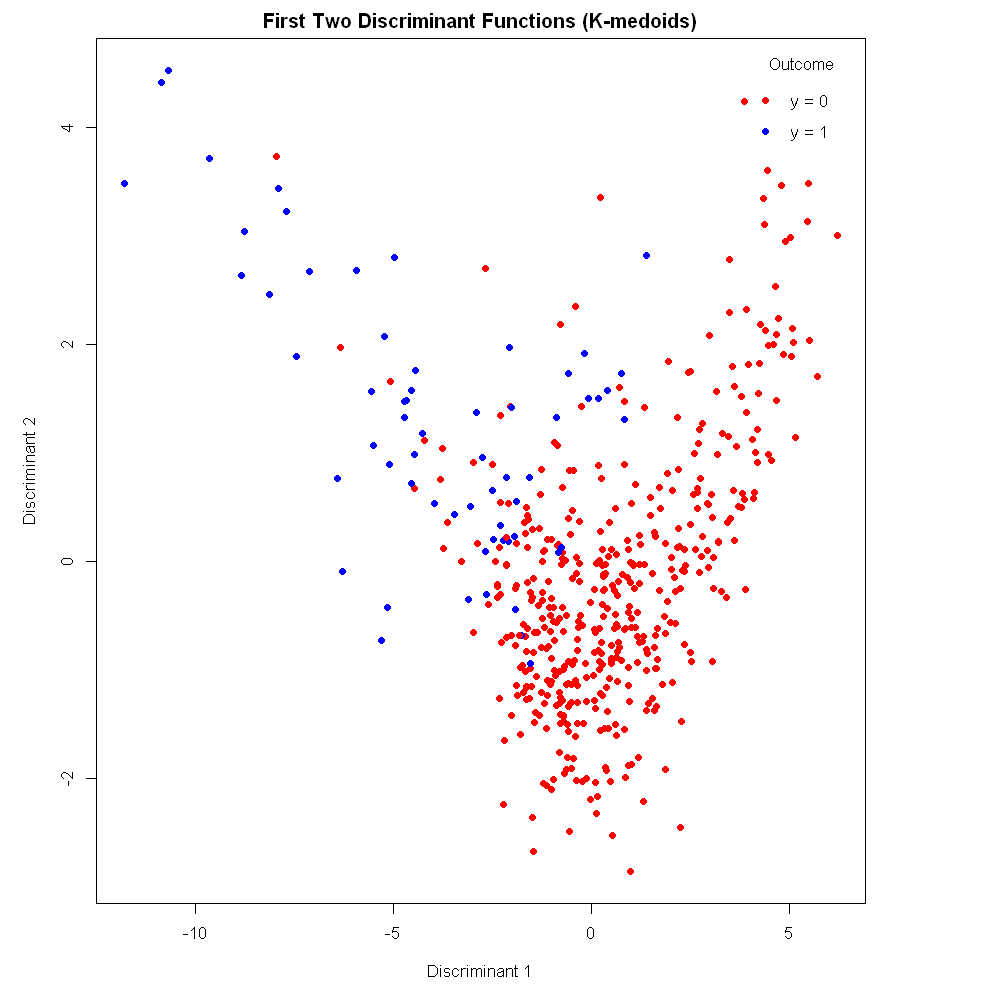

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
    lda_scores[, 1], lda_scores[, 2],
    col = colors,
    pch = 19,
    main = "First Two Discriminant Functions (K-medoids)",
    xlab = "Discriminant 1",
    ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
    "topright",
    legend = c("y = 0", "y = 1"),
    col = c("red", "blue"),
    pch = 19,
    title = "Outcome",
    xpd = TRUE,
    bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)

#### Silhouette

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(df[, cols])
silhouette_score <- silhouette(kmedoids_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.1493789


#### DBI

In [ ]:
index.DB(df[, cols], df$kmedoids_clust, d=dist_matrix, centrotypes="medoids", p=2, q=2)$DB

[1] 1.815592

### 5 Medoids

In [ ]:
# Perform k-medoids clustering with the optimal number of clusters
optimal_k <- 5 # Replace with the optimal number of clusters found from the plot
kmedoids_result <- pam(df[, cols], k = optimal_k)
df$kmedoids_clust <- kmedoids_result$clustering

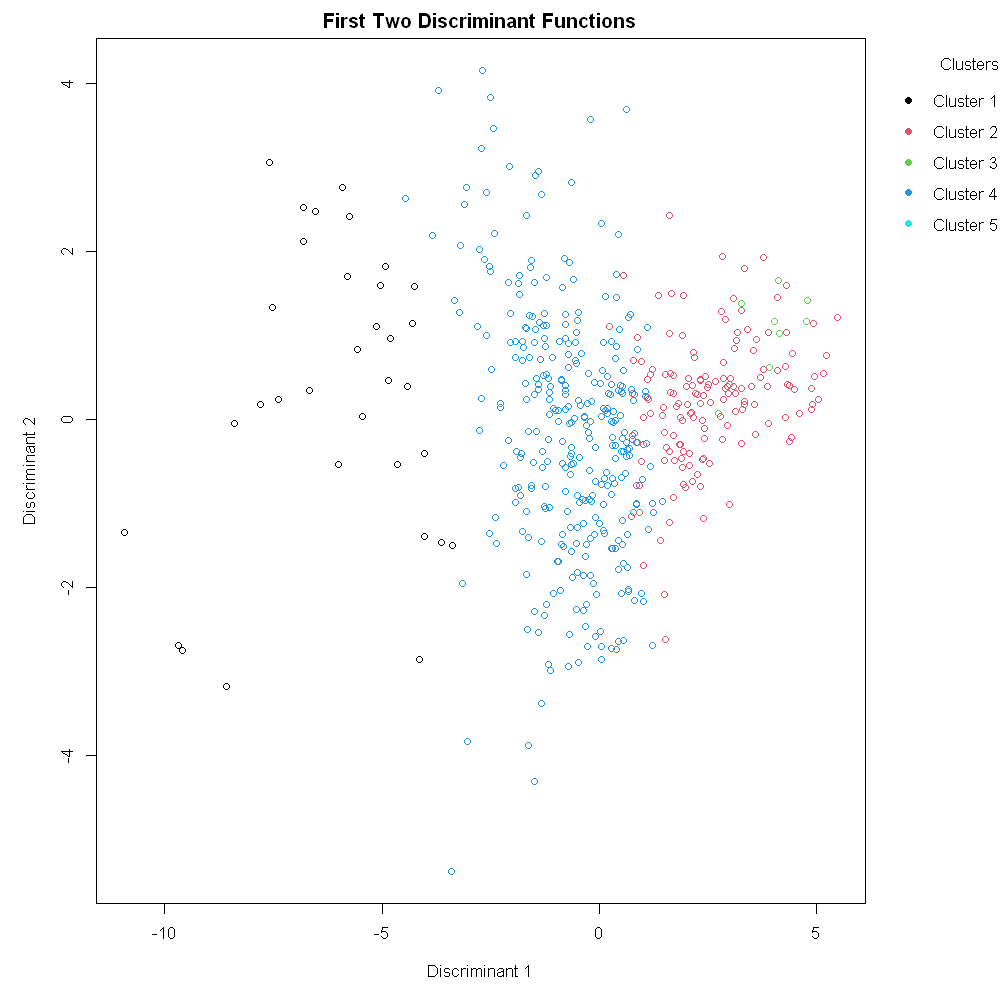

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:5), col = 1:5, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

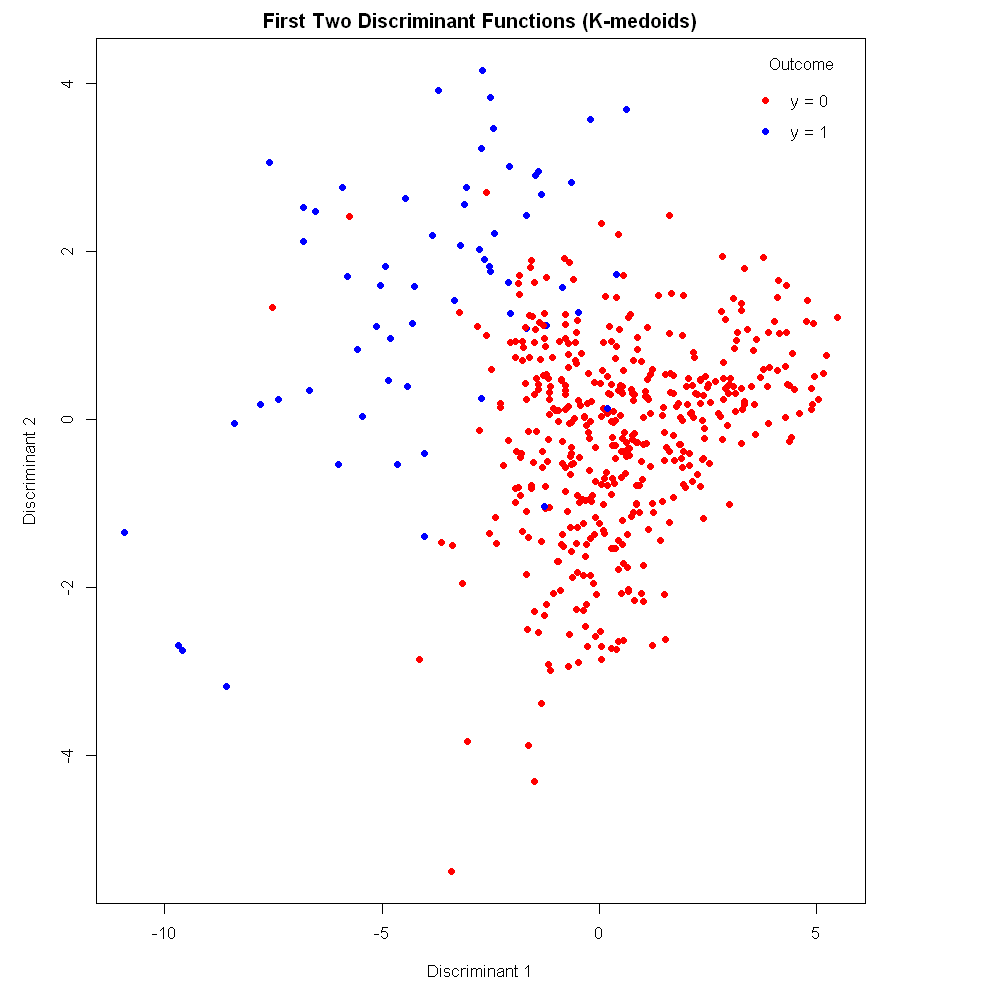

In [ ]:
# Compute discriminant functions
lda_model <- lda(df[, cols], grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
    lda_scores[, 1], lda_scores[, 2],
    col = colors,
    pch = 19,
    main = "First Two Discriminant Functions (K-medoids)",
    xlab = "Discriminant 1",
    ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
    "topright",
    legend = c("y = 0", "y = 1"),
    col = c("red", "blue"),
    pch = 19,
    title = "Outcome",
    xpd = TRUE,
    bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)

#### Silhouette

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(df[, cols])
silhouette_score <- silhouette(kmedoids_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.143475


#### DBI

In [ ]:
index.DB(df[, cols], df$kmedoids_clust, d=dist_matrix, centrotypes="medoids", p=2, q=2)$DB

[1] 1.872063

## PCA

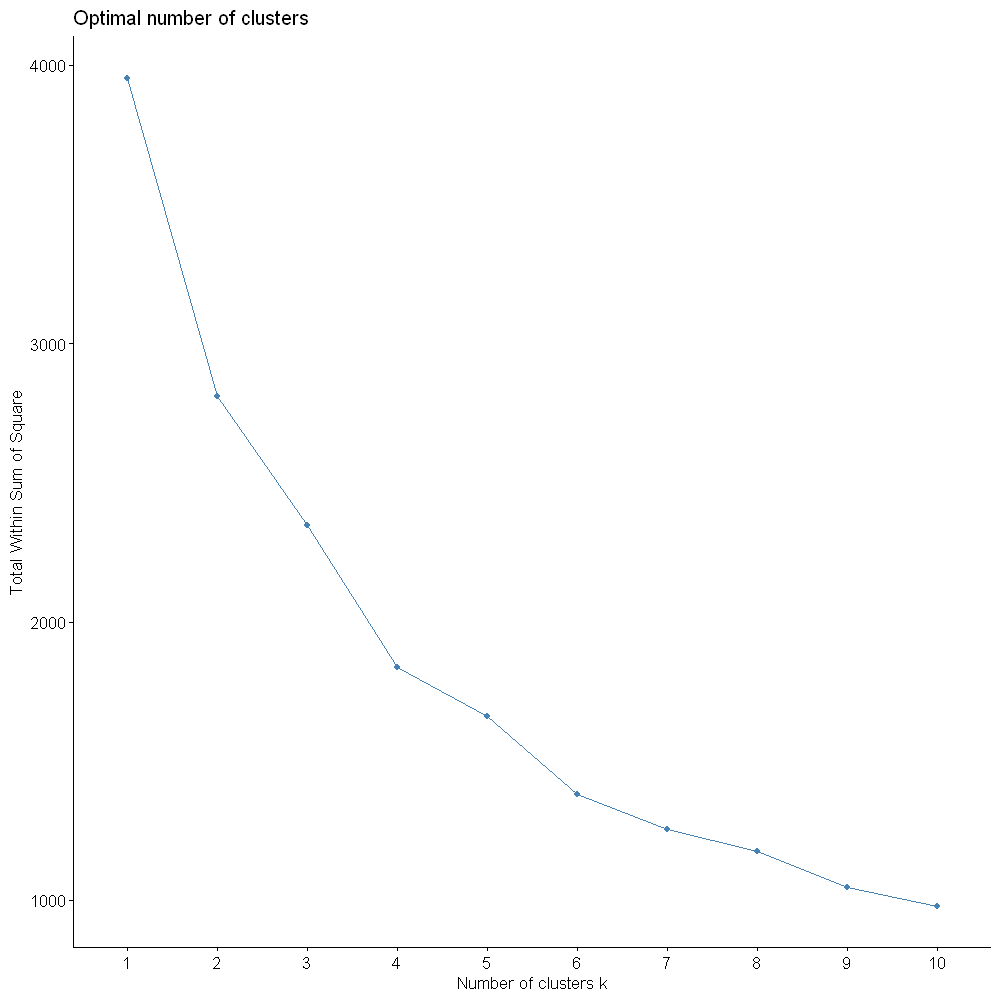

In [ ]:
fviz_nbclust(pc, pam, method = 'wss')

### 3 Medoids

In [ ]:
# Perform k-medoids clustering with the optimal number of clusters
optimal_k <- 3 # Replace with the optimal number of clusters found from the plot
kmedoids_result <- pam(pc, k = optimal_k)
df$kmedoids_clust <- kmedoids_result$clustering

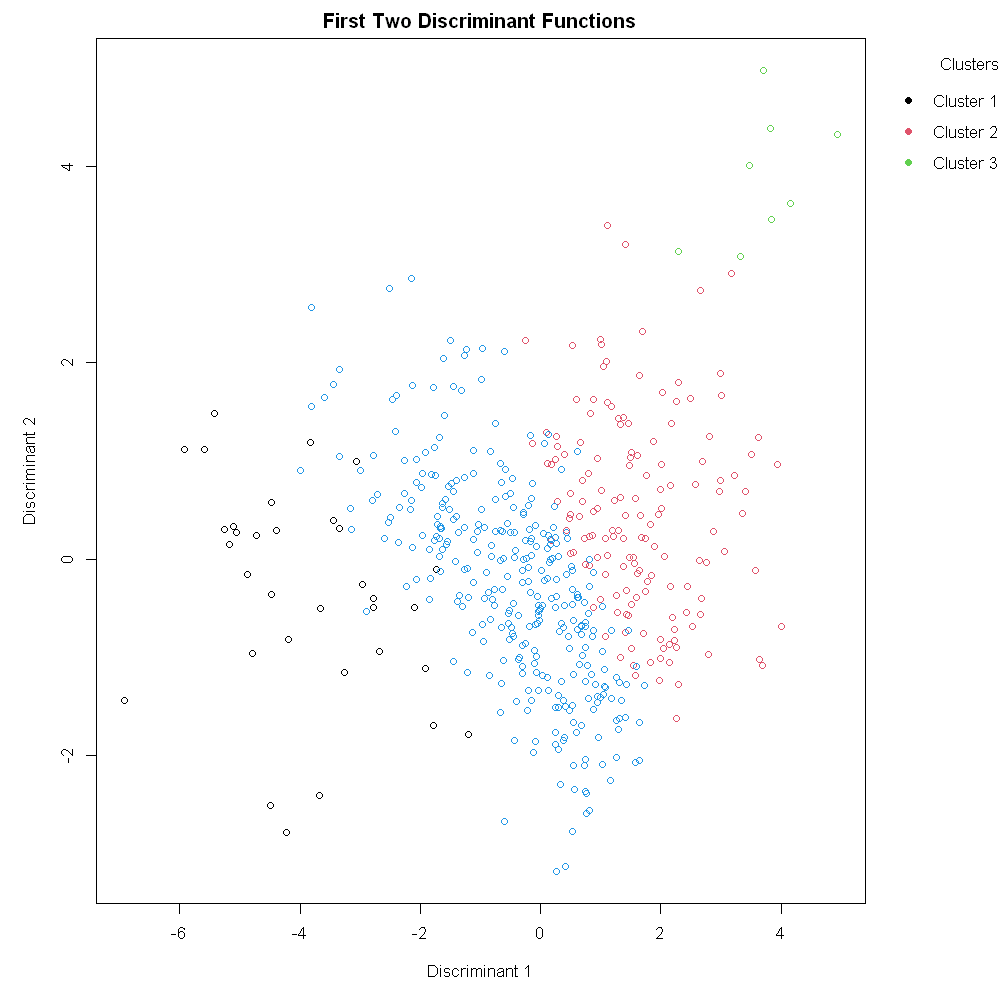

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:3), col = 1:3, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

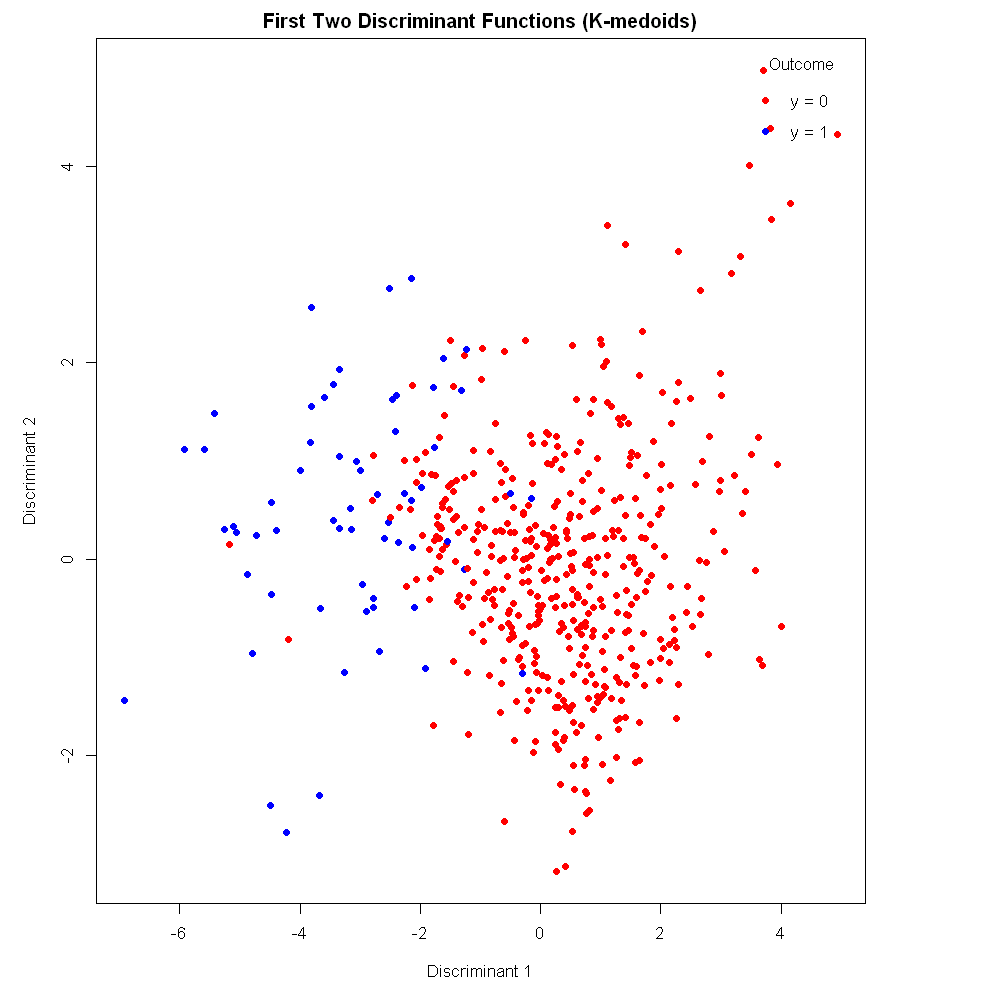

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
    lda_scores[, 1], lda_scores[, 2],
    col = colors,
    pch = 19,
    main = "First Two Discriminant Functions (K-medoids)",
    xlab = "Discriminant 1",
    ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
    "topright",
    legend = c("y = 0", "y = 1"),
    col = c("red", "blue"),
    pch = 19,
    title = "Outcome",
    xpd = TRUE,
    bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)

#### Silhouette

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(pc)
silhouette_score <- silhouette(kmedoids_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.2027242


#### DBI

In [ ]:
index.DB(pc, df$kmedoids_clust, d=dist_matrix, centrotypes="medoids", p=2, q=2)$DB

[1] 2.177747

### 4 Medoids

In [ ]:
# Perform k-medoids clustering with the optimal number of clusters
optimal_k <- 4 # Replace with the optimal number of clusters found from the plot
kmedoids_result <- pam(pc, k = optimal_k)
df$kmedoids_clust <- kmedoids_result$clustering

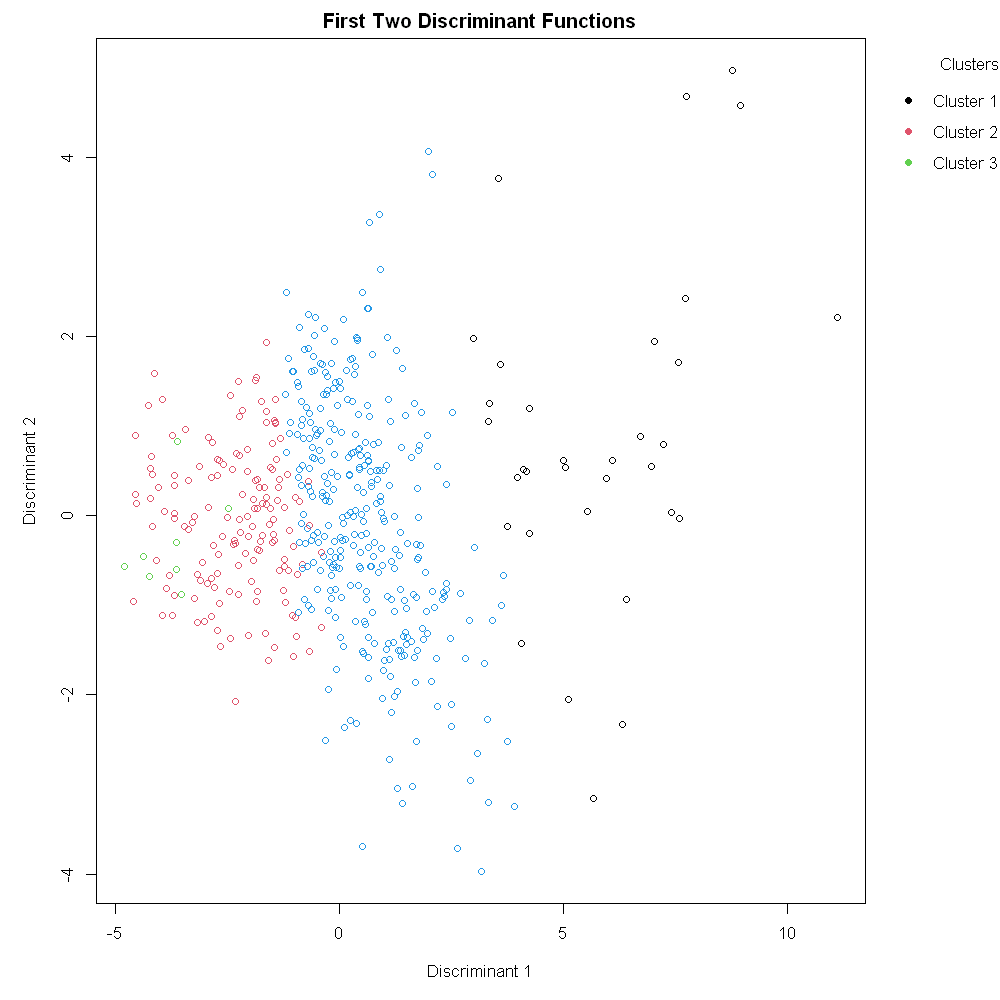

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:3), col = 1:3, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

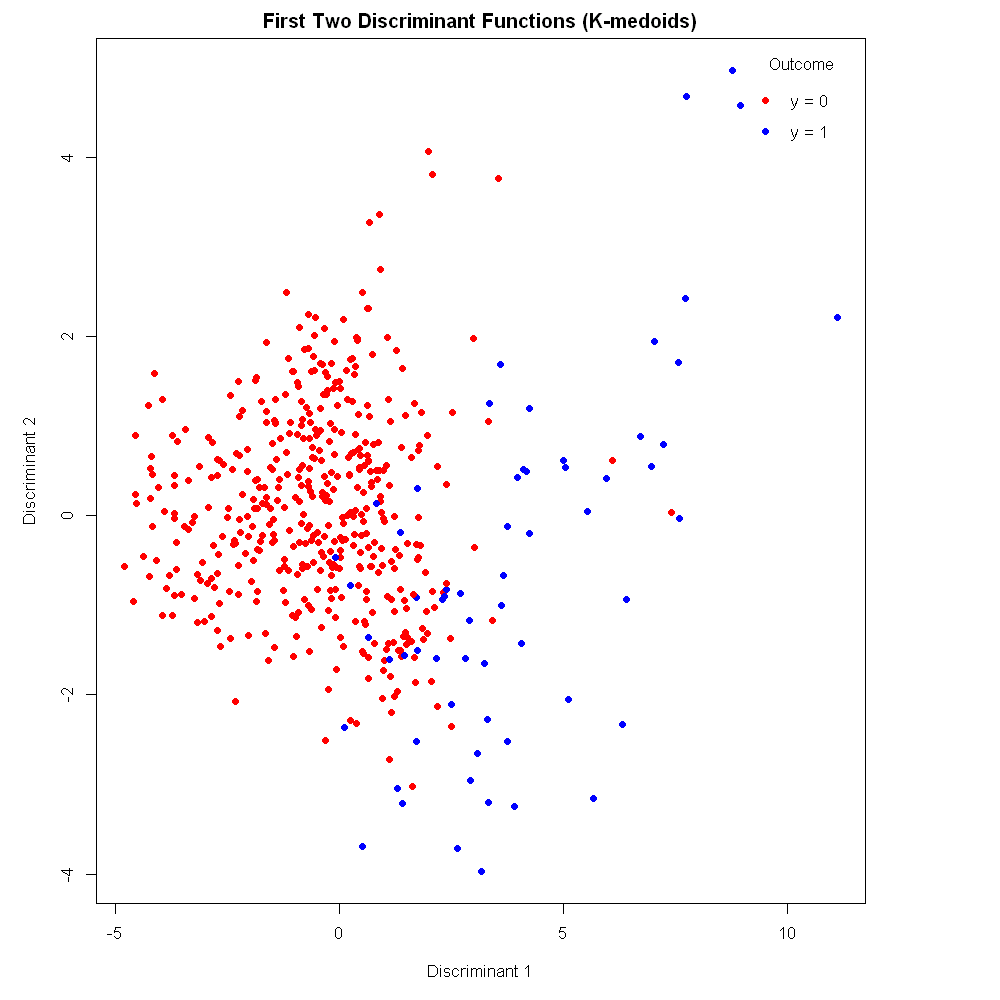

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
    lda_scores[, 1], lda_scores[, 2],
    col = colors,
    pch = 19,
    main = "First Two Discriminant Functions (K-medoids)",
    xlab = "Discriminant 1",
    ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
    "topright",
    legend = c("y = 0", "y = 1"),
    col = c("red", "blue"),
    pch = 19,
    title = "Outcome",
    xpd = TRUE,
    bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)

#### Silhouette

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(pc)
silhouette_score <- silhouette(kmedoids_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.2019829


#### DBI

In [ ]:
index.DB(pc, df$kmedoids_clust, d=dist_matrix, centrotypes="medoids", p=2, q=2)$DB

[1] 1.66518

### 5 Medoids

In [ ]:
# Perform k-medoids clustering with the optimal number of clusters
optimal_k <- 5 # Replace with the optimal number of clusters found from the plot
kmedoids_result <- pam(pc, k = optimal_k)
df$kmedoids_clust <- kmedoids_result$clustering

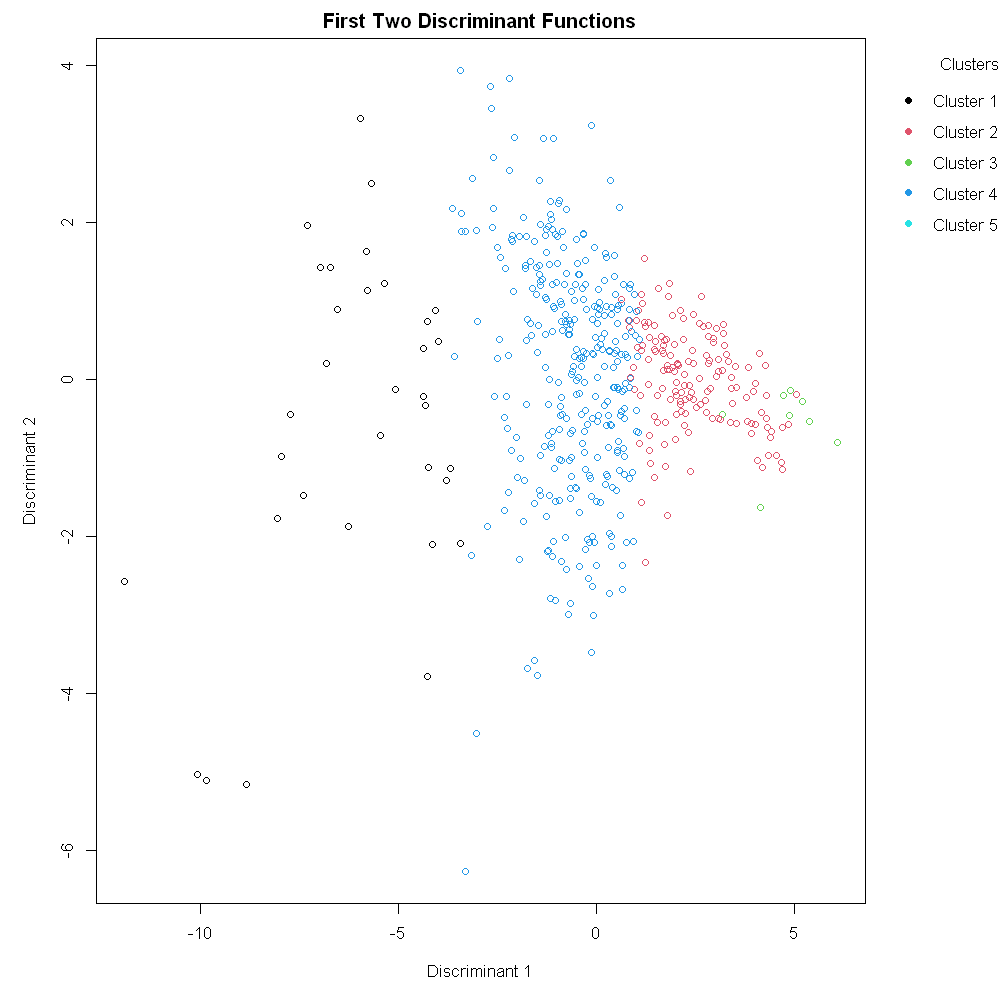

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Plot the first two discriminant functions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area
par(mar = c(5, 5, 2, 7), xpd = TRUE)  # Adjust the margins and allow plotting outside the plot region

# Plot the first two discriminant functions
plot(lda_scores[, 1], lda_scores[, 2], col = df$kmeans_clust, main = "First Two Discriminant Functions", xlab = "Discriminant 1", ylab = "Discriminant 2")
legend("topright", inset = c(-0.25, 0), legend = paste("Cluster", 1:5), col = 1:5, pch = 19, title = "Clusters", xpd = TRUE, bty='n')

# Reset par to default
par(mar = c(5, 4, 4, 2) + 0.1)  # Reset the margins to default

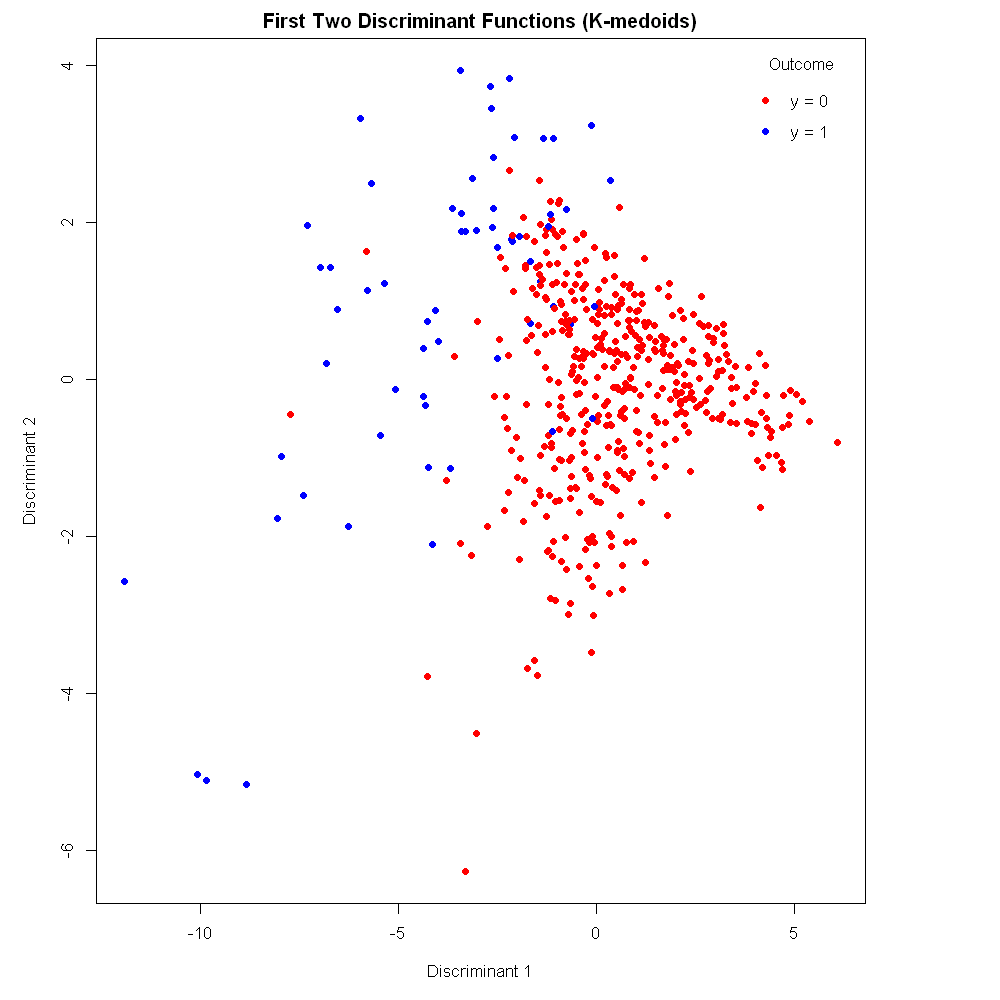

In [ ]:
# Compute discriminant functions
lda_model <- lda(pc, grouping = df$kmedoids_clust)
lda_scores <- predict(lda_model)$x

# Set up plot dimensions
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

# Set up the plotting area with adjusted margins
par(mar = c(5, 5, 2, 7), xpd = TRUE)

# Define colors: red for 0, blue for 1
colors <- ifelse(df$y == 1, "blue", "red")

# Plot the first two discriminant functions with custom colors based on df$y
plot(
    lda_scores[, 1], lda_scores[, 2],
    col = colors,
    pch = 19,
    main = "First Two Discriminant Functions (K-medoids)",
    xlab = "Discriminant 1",
    ylab = "Discriminant 2"
)

# Add a legend outside the plot area
legend(
    "topright",
    legend = c("y = 0", "y = 1"),
    col = c("red", "blue"),
    pch = 19,
    title = "Outcome",
    xpd = TRUE,
    bty = 'n'
)

# Reset margins to default
par(mar = c(5, 4, 4, 2) + 0.1)

#### Silhouette

In [ ]:
# Calculate silhouette score
dist_matrix <- dist(pc)
silhouette_score <- silhouette(kmedoids_result$cluster, dist_matrix)
mean_silhouette_score <- mean(silhouette_score[, 3])

# Print the mean silhouette score
print(mean_silhouette_score)

[1] 0.188238


#### DBI

In [ ]:
index.DB(pc, df$kmedoids_clust, d=dist_matrix, centrotypes="medoids", p=2, q=2)$DB

[1] 1.684352